In [66]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf
from dask.diagnostics import ProgressBar
import matplotlib.lines as mlines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [48]:
# Load labor productivity data
ds = xr.open_dataset('../data/processed/labor_productivity.nc').rename({'WBT':'capacity'})

In [50]:
# Population data
ds_pop = xr.open_dataset('../data/processed/population_regrid.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

# Labor Capacity Function

In [53]:
def capacity(ds,population,region,ax):
    # Get yearly capacity data for grid cells in region
    ds_region = mf.slice_region(ds,region)
    
    # Get weighted area for grid cells
    pop_region = mf.slice_region(population,region)
    #pop_weights = pop_region/pop_region.sum(['lat','lon'])
    
    # Calculate total area-weighted capacity per year
    capacity = ds_region.weighted(pop_region).mean(['lon','lat'])
    
    # Loop through ensemble members
    for ens in capacity['ensemble']:
        capacity.sel(ensemble=ens).plot(ax=ax,color='royalblue',alpha=0.25)

    # Ensemble average labor capacity
    capacity_avg = capacity.mean(dim='ensemble')
    capacity_avg.plot(ax=ax,color='royalblue',linewidth=2)
    ax.set_xlabel('Year')
    ax.set_ylabel('Labor Capacity, %')
    ax.set_title(region)

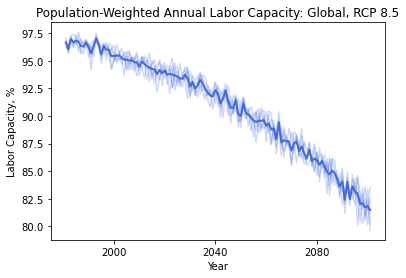

In [54]:
fig,ax = plt.subplots()
capacity(ds['capacity'],ds_pop,'Global',ax)
ax.set_title('Population-Weighted Annual Labor Capacity: Global, RCP 8.5')
plt.savefig('labor_change_global.png')

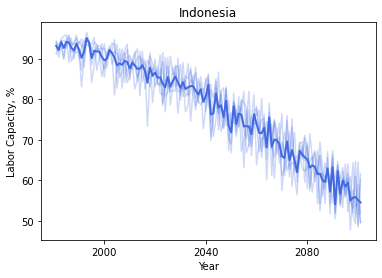

In [56]:
fig,ax = plt.subplots()
capacity(ds['capacity'],ds_pop,'Indonesia',ax)

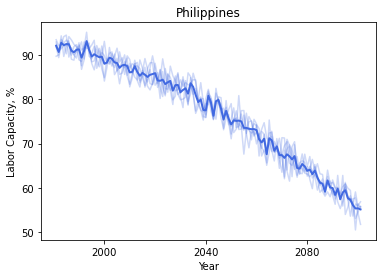

In [57]:
fig,ax = plt.subplots()
capacity(ds['capacity'],ds_pop,'Philippines',ax)

# Plots for Regions

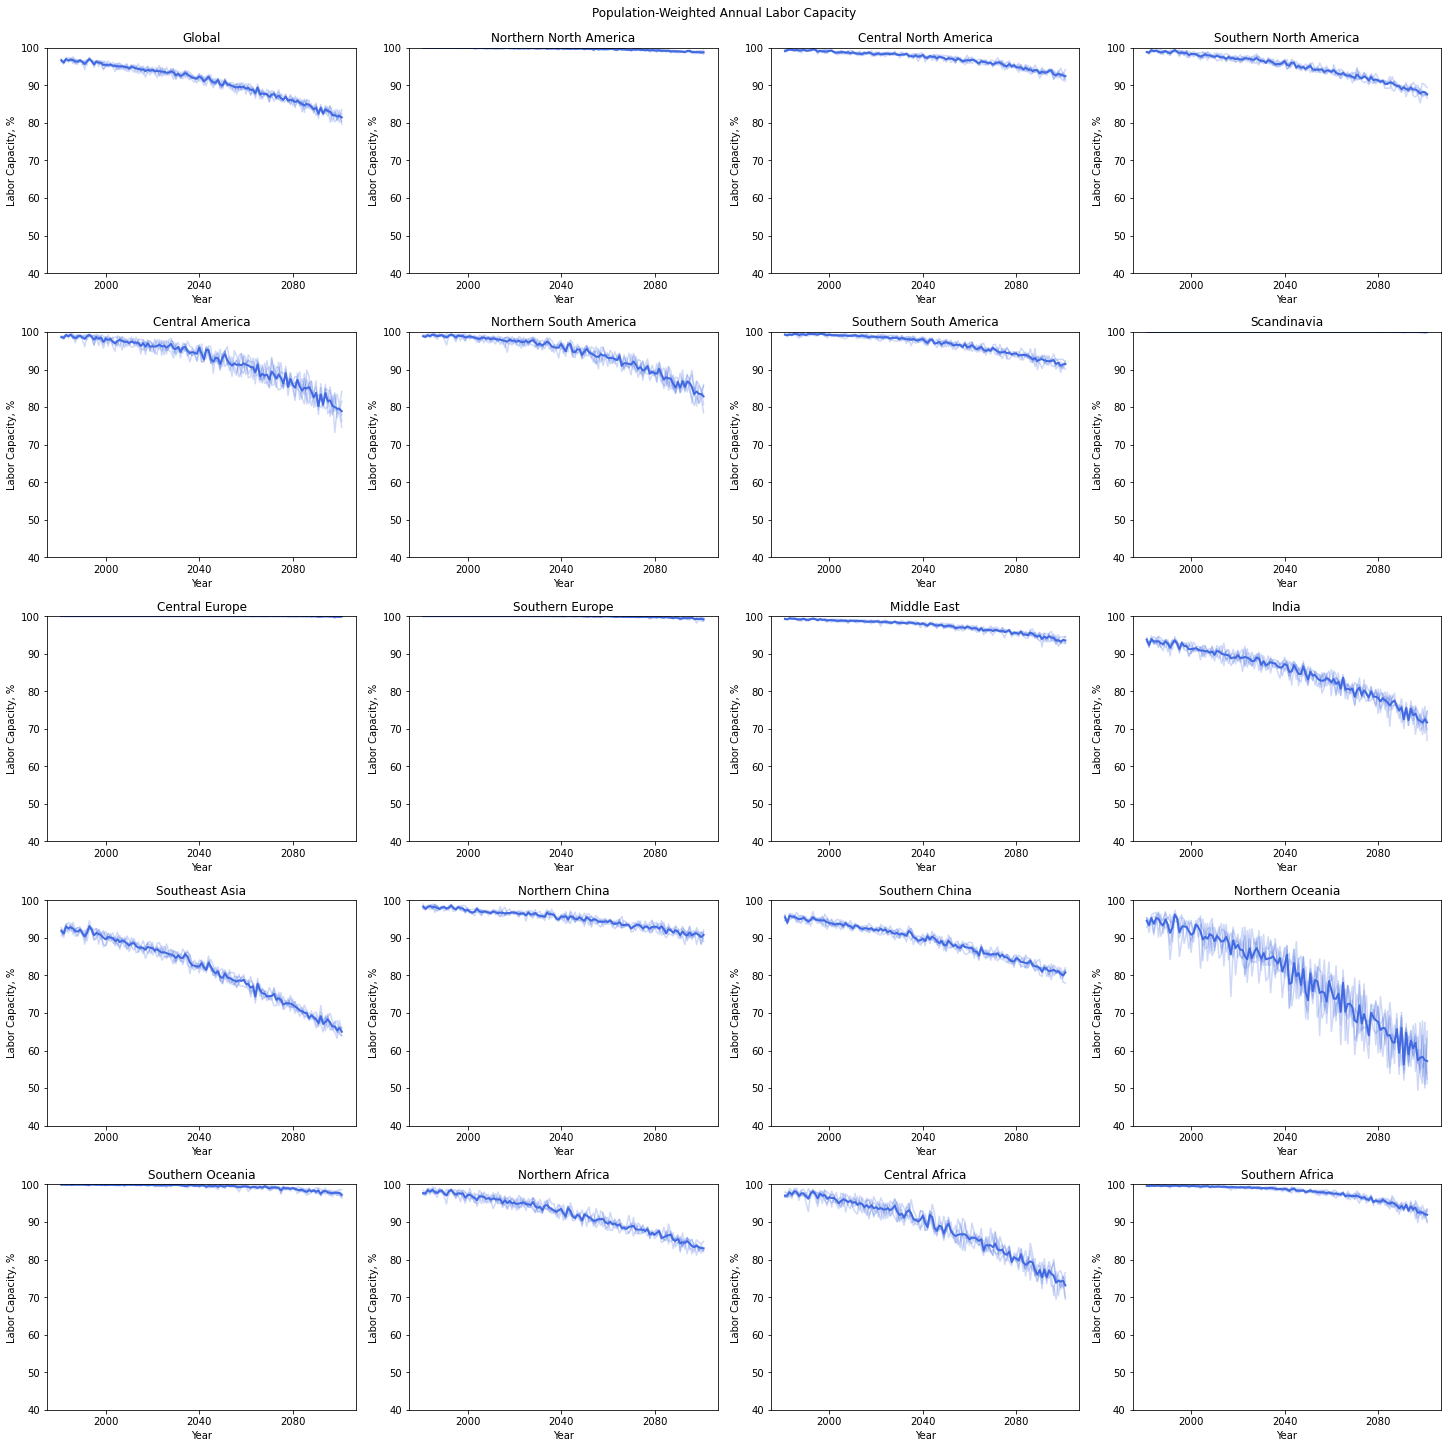

In [55]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    capacity(ds['capacity'],ds_pop,region,ax)
    ax.set_ylim([40,100])
fig.suptitle('Population-Weighted Annual Labor Capacity');
fig.savefig('labor_change_regions.png')

# Global Visualization

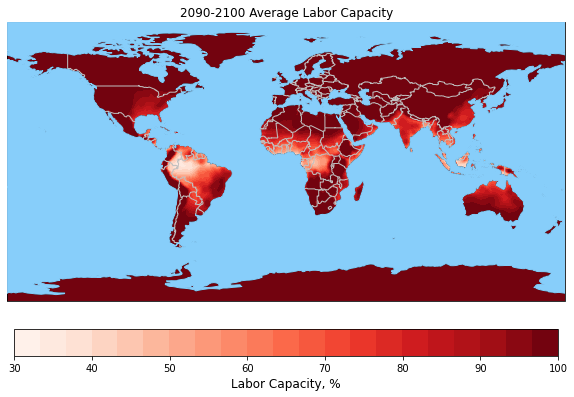

In [36]:
# Ensemble average labor capacity
capacity_avg = ds.isel(time=slice(-10,None)).mean(['time','ensemble'])
mf.contour_plot(capacity_avg['capacity'],'Global','2090-2100 Average Labor Capacity','Reds',borders=True,label='Labor Capacity, %')
plt.savefig('labor_capacity_2090.png')

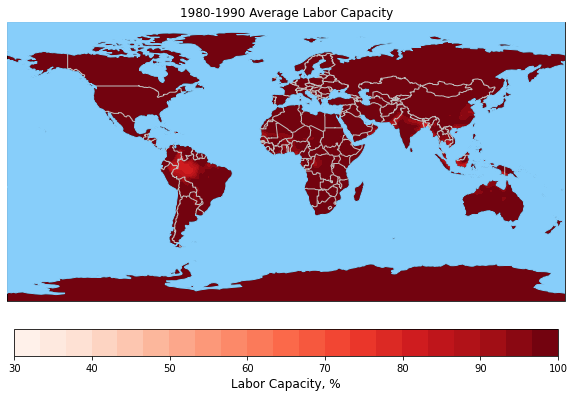

In [39]:
# Ensemble average labor capacity
capacity_avg = ds.isel(time=slice(0,10)).mean(['time','ensemble'])
mf.contour_plot(capacity_avg['capacity'],'Global','1980-1990 Average Labor Capacity','Reds',borders=True,label='Labor Capacity, %')
plt.savefig('labor_capacity_1980.png')

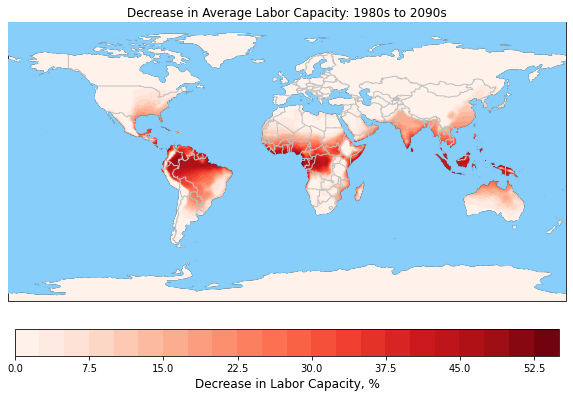

In [46]:
# Ensemble average labor capacity
capacity_change = ds.isel(time=slice(0,10)).mean(['time','ensemble']) - ds.isel(time=slice(-10,None)).mean(['time','ensemble'])
mf.contour_plot(capacity_change['capacity'],'Global','Decrease in Average Labor Capacity: 1980s to 2090s','Reds',borders=True,label='Decrease in Labor Capacity, %')
plt.savefig('labor_capacity_change.png')

# Subregional Spotlight

In [79]:
def point_capacity(ds,population,region,ax):
    # Get yearly capacity data for grid cells in region
    ds_region = mf.slice_region(ds,region)

    # Ensemble average labor capacity
    capacity_avg = ds_region.mean(dim='ensemble')

    # Split into grid cells
    capacity_avg_adj = capacity_avg.stack(xy=('lon','lat'))
    capacity_avg_adj['capacity'].plot(hue='xy',add_legend=False,color='royalblue',alpha=0.15,linewidth=0.5,ax=ax);

    # Get weighted area for grid cells
    pop_region = mf.slice_region(population,region)

    # Calculate total area-weighted capacity per year
    capacity = ds_region.weighted(pop_region).mean(['lon','lat','ensemble'])
    capacity['capacity'].plot(ax=ax,color='royalblue',linewidth=3)

    ax.set_title('Annual Labor Capacity: ' + region)
    ax.set_xlabel('Year')
    ax.set_ylabel('Labor Capacity, %')

    blue_line = mlines.Line2D([], [], color='royalblue', label='Population-weighted average',linewidth=2)
    blue_line2 = mlines.Line2D([], [], color='royalblue', label='Individual grid cell',linewidth=0.5)
    ax.legend(handles=[blue_line,blue_line2],loc='lower left');

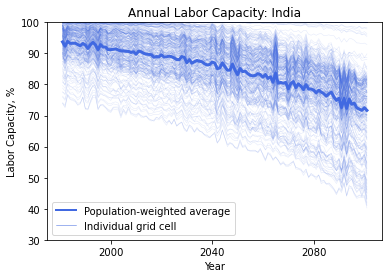

In [81]:
fig,ax=plt.subplots()
point_capacity(ds,ds_pop,'India',ax)
plt.savefig('labor_change_India.png')

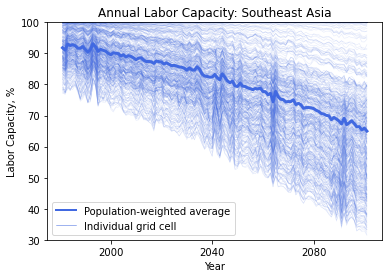

In [82]:
fig,ax=plt.subplots()
point_capacity(ds,ds_pop,'Southeast Asia',ax)
plt.savefig('labor_change_SAsia.png')

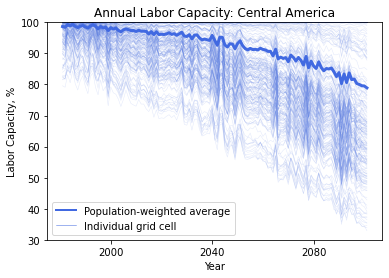

In [83]:
fig,ax=plt.subplots()
point_capacity(ds,ds_pop,'Central America',ax)
plt.savefig('labor_change_CAmerica.png')

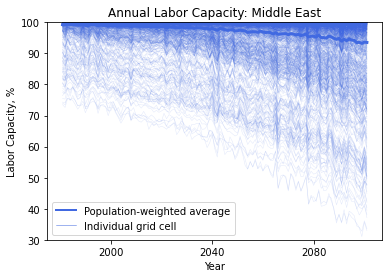

In [85]:
fig,ax=plt.subplots()
point_capacity(ds,ds_pop,'Middle East',ax)
plt.savefig('labor_change_MidEast.png')

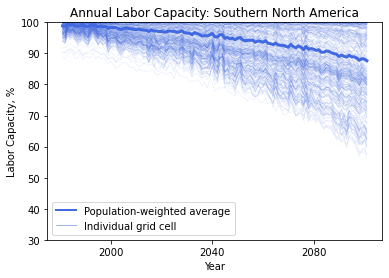

In [84]:
fig,ax=plt.subplots()
point_capacity(ds,ds_pop,'Southern North America',ax)
plt.savefig('labor_change_SNAmerica.png')